# PCA : Fashion MNIST

## We load the libs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns


## We load ours data

In [2]:
train_full = pd.read_csv('fashion-mnist_train.csv')

train_full.shape

(60000, 785)

## We split ours data in train and dev set 
* fix random seed for reproducibility

In [3]:
fixed_seed = 2012
train, dev = train_test_split(train_full, test_size = 0.3, random_state=fixed_seed)

## we separate our data into x and y

In [4]:
x_train = train.drop('label', axis=1)
y_train = train['label']
x_train.shape

(42000, 784)

## We get the shape of ours data
* we keep the number of observations in the variable n
* we keep the number of features in the variable p

In [5]:
n = x_train.shape[0]

p = x_train.shape[1]

In [6]:
x_dev = dev.drop('label', axis=1)
y_dev = dev['label']

## We initialyse the model

In [7]:
pca = PCA()

## We fit the model

In [8]:
pca_result = pca.fit(x_train)

## We showing screes plot

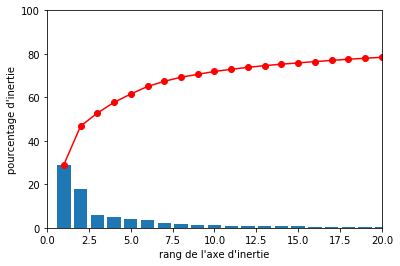

In [9]:
eboulis = pca.explained_variance_ratio_*100
figsize=(20,20)
plt.bar(np.arange(len(eboulis))+1, eboulis)
plt.plot(np.arange(len(eboulis))+1, eboulis.cumsum(),c="red",marker='o')
plt.ylim(0,100)
plt.xlim(0,20)
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.show()

## we calculate the coordinates

In [10]:
#calculs
coord = pd.DataFrame(pca.fit_transform(x_train))

In [11]:
coord['label'] = ['c' + str(y) for y in y_train]

coord

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,-568.701770,1360.628690,-1283.180069,1.308041,-474.135644,50.665877,-423.022947,193.895824,-143.944373,-128.870876,...,0.034603,-0.249681,-0.073725,-0.085095,-0.017349,0.279679,0.032793,0.000135,-0.001930,c7
1,1071.727552,-1201.656521,-724.663623,-44.838370,287.256574,196.041306,5.242457,-308.468272,145.435581,-229.633741,...,-0.230928,0.084937,-0.611598,-0.346080,-0.120407,0.189328,-0.077985,0.011901,0.010607,c3
2,-1033.283050,677.339247,-324.413938,-429.189933,-116.532621,163.889167,-224.170386,-6.912384,-24.475931,-101.225826,...,0.289976,-0.214120,-0.116240,0.110987,-0.023521,0.024378,-0.018056,-0.022207,-0.011873,c9
3,-1335.319833,939.061257,-393.639383,-460.580757,141.851624,119.795284,-338.802886,-157.770640,395.611623,-374.947324,...,0.070701,-0.212505,0.005608,-0.066584,0.004090,-0.082218,0.008176,0.006963,-0.000320,c7
4,-1562.656003,202.044970,254.752420,-716.756034,253.890705,160.527959,163.135352,-633.706444,-177.241258,365.300225,...,-0.041953,0.043187,-0.060405,-0.173320,-0.001451,0.017111,-0.018458,-0.001915,-0.000152,c7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,-1442.810869,486.508010,258.752862,-696.014306,305.868590,168.908674,-27.404834,-395.006892,129.657422,-64.748214,...,0.106029,-0.170290,0.112191,-0.102330,0.100974,0.007390,0.010222,-0.020282,-0.004068,c5
41996,498.449065,-1464.601868,-347.552487,-578.433160,-337.453427,-280.813664,292.414519,250.461351,748.749526,470.837713,...,0.045360,0.086531,-0.250211,-0.133524,-0.043059,-0.000230,-0.028054,-0.005962,-0.002741,c1
41997,-1259.246869,661.705912,-399.270212,249.652919,-136.014874,-52.741787,-411.835271,172.880118,239.418357,-168.168846,...,0.148502,0.156513,0.052713,-0.031718,0.256811,-0.053595,-0.035123,-0.008287,-0.007666,c9
41998,-764.604944,745.180788,56.591901,-379.634384,-15.609594,235.078004,32.048477,521.695225,-115.547066,-157.622205,...,0.097056,-0.834964,-0.327618,0.341174,0.275547,-0.321485,0.110348,-0.016237,0.014158,c8


## We display the scatterplot of PCA

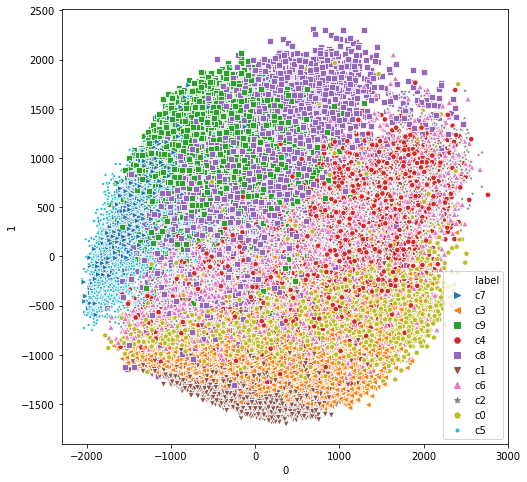

In [12]:
markers = {"c0": "p","c5": ".","c6": "^","c4": "H","c1": "v","c2": "*","c3": "<","c9": "s","c7": ">","c8": ","}
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(coord[0],coord[1],  data=coord, hue='label', style='label',  markers=markers)